### Estimar RL para outras frequências através de ML

### Tentativa 1

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Ir para pasta Dados
local = os.getcwd()
os.chdir('./dados')


In [3]:
pwd

'/home/miguel/Apps/Data_Science_Python_GIT/06_RL_by_ML/dados'

Importar dados teóricos do VNA

In [4]:
#Pegar os arquivos
TXT =[arquivos for arquivos in os.listdir(local+'/dados') if arquivos[len(arquivos)-4:] == '.txt']

df = []

for txt in TXT:
    df.append(pd.read_csv(txt, sep= '\t', skipinitialspace = True))

In [5]:
df[3].max() # Valores Máximos

f(GHz)    12.39
e'         0.53
e"         1.04
u'         0.53
u"         1.04
tan_e     83.53
tan_u     83.53
RL        -0.11
RL_med    -3.20
Zin       56.75
S11        0.99
S21        0.35
A          0.95
R          0.98
T          0.12
SEt       22.35
SEr       17.11
SEa       22.14
SEmr      -0.00
dtype: float64

In [6]:
df[3].min() # Valores Mínimos

f(GHz)     8.20
e'        -0.52
e"         0.00
u'        -0.52
u"         0.00
tan_e    -13.97
tan_u    -13.97
RL       -37.12
RL_med    -3.20
Zin        0.33
S11        0.22
S21        0.06
A          0.02
R          0.05
T          0.00
SEt        8.64
SEr        0.21
SEa        5.72
SEmr      -2.63
dtype: float64

In [7]:
amostra = df[3] # Escolhe essa amostra por ter uma boa atenuação

In [8]:
amostra.head()

,f(GHz),e',"e""",u',"u""",tan_e,tan_u,RL,RL_med,Zin,S11,S21,A,R,T,SEt,SEr,SEa,SEmr
0,8.20,0.08,0.0,0.08,0.0,0.06,0.06,-0.13,-3.2,0.38,0.99,0.06,0.02,0.98,0.0,22.00,17.11,6.85,-1.96
1,8.21,0.08,0.0,0.08,0.0,0.06,0.06,-0.13,-3.2,0.39,0.99,0.06,0.02,0.98,0.0,21.92,17.04,6.85,-1.97
2,8.22,0.08,0.0,0.08,0.0,0.06,0.06,-0.13,-3.2,0.39,0.99,0.06,0.02,0.98,0.0,21.85,16.98,6.84,-1.97
3,8.23,0.08,0.0,0.08,0.0,0.06,0.06,-0.14,-3.2,0.40,0.99,0.06,0.02,0.98,0.0,21.77,16.91,6.83,-1.97
4,8.24,0.08,0.0,0.08,0.0,0.06,0.06,-0.14,-3.2,0.40,0.99,0.07,0.02,0.98,0.0,21.70,16.85,6.83,-1.98


In [9]:
"""X = amostra.drop(
    labels = ['RL','tan_e','tan_u'],
    axis = 1
)"""


X = amostra[["e'",'e"']] # Em vez de retirar cada elemento, optei por colocar... ganha tempo

y = amostra['RL']

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
"""tree = DecisionTreeClassifier(
    max_depth=2, # número de perguntas
    random_state=0,
)

tree.fit(X,y)"""#Não funciona, pois entende que os dados são contínuos....

'tree = DecisionTreeClassifier(\n    max_depth=2, # número de perguntas\n    random_state=0,\n)\n\ntree.fit(X,y)'

In [12]:
#tree.score(X,y)

### Tentativa 2 

Vou ter que mudar os dados para conseguir usar o DecisionTreeClassifier <br>
Terei de multiplicar tudo pro 100 para remover a vírgula e transformar em um inteiro depois

In [13]:
sample = df[3]


f =[]
e1 = []
e2 = []
u1 = []
u2 = []
RL =[]

dados ={
    'f':f,
    "e1":e1,
    'e2':e2,
    "u1":u1,
    'u2':u2,
    'RL':RL,
}

k = 100 # Constante que tive que atribuir para que não aredondasse os números pequenos pra zero
#na transformação de float pra inteiro (OBS: NÃO PODEMOS ESQUECER DE COLOCAR A CONSTANTE NAS PREVISÕES FUTURAS)

#Organizar o diciornário
for i in range(0,len(sample)):
    if i%9== 0:#Pulas alguns dados, pois estão muito pŕoximos
        
        # Tive que transformar tudo em int para evitar o problema contínuo
        # e multipliquei por 100 para n arredondar pra zero
        dados['f'].append(int(k*sample['f(GHz)'][i]))
        dados["e1"].append(int(k*sample["e'"][i]))
        dados["e2"].append(int(k*sample['e"'][i]))
        dados["u1"].append(int(k*sample["u'"][i]))
        dados["u2"].append(int(k*sample['u"'][i]))
        dados['RL'].append(int(k*sample['RL'][i]))
    
#Tabela do Pandas
sample = pd.DataFrame(dados)

In [14]:
sample.head()

,f,e1,e2,u1,u2,RL
0,819,8,0,8,0,-13
1,828,8,0,8,0,-15
2,838,8,1,8,1,-16
3,847,9,1,9,1,-19
4,856,9,1,9,1,-21


In [15]:
X = sample.drop('RL',axis = 1)
y = sample[['RL']]


tree = DecisionTreeClassifier(
    max_depth=15, # número de perguntas
    random_state=0,
)

tree.fit(X,y)#Treinar

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [16]:
tree.score(X,y)

1.0

In [17]:
y['pred_RL'] = tree.predict(X) #Adiciona uma predição dos dados de RL para os parâmetros já treinados
y['f'] = X[['f']] # Coloquei a coluna frequência para plotar mais tarde

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
dfy = pd.DataFrame(y)#/100 # Tenho que dividir tudo novamente
dfy.head()

,RL,pred_RL,f
0,-13,-13,819
1,-15,-15,828
2,-16,-16,838
3,-19,-19,847
4,-21,-21,856


In [19]:
X = X#/100 # novamente dividir por 100
X.head()

,f,e1,e2,u1,u2
0,819,8,0,8,0
1,828,8,0,8,0
2,838,8,1,8,1
3,847,9,1,9,1
4,856,9,1,9,1


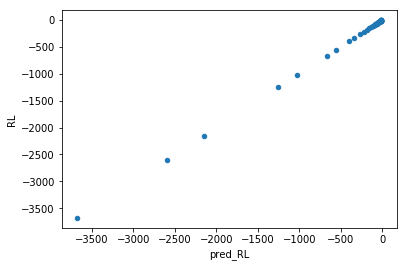

In [20]:
dfy.plot(x = 'pred_RL', y = 'RL',kind = 'scatter')

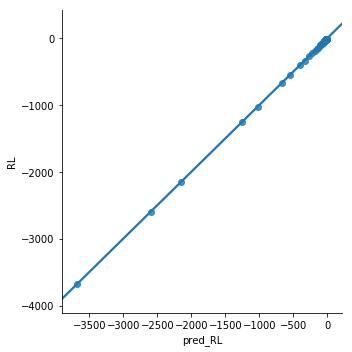

In [21]:
sns.lmplot(x = 'pred_RL',y = 'RL', data = dfy)

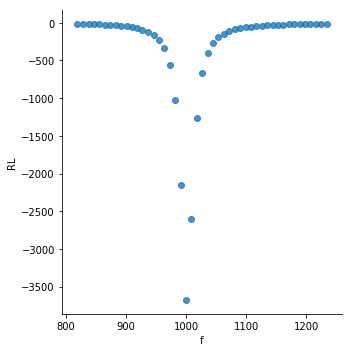

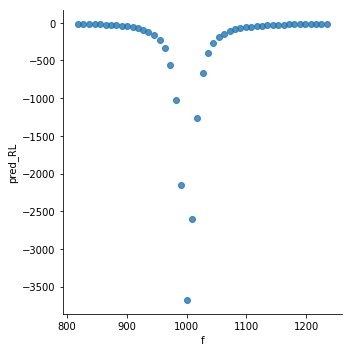

In [22]:
sns.lmplot(x = 'f',y = 'RL', data = dfy,fit_reg=False) # original
sns.lmplot(x = 'f',y = 'pred_RL', data = dfy,fit_reg=False) #Predição
#plt.plot(dfy['f'],dfy['pred_RL'], '-*r')


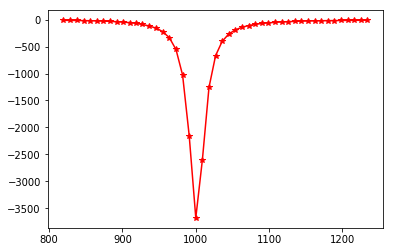

In [23]:
plt.plot(dfy['f'],dfy['pred_RL'], '-*r')

### Variar a freq e manter e and u

para isso basta introduzirmos valores da banda-Ku (12.4-18GHz) na frequência dos dados X e mandar novamente fazer uma predição

In [24]:
#NÃO ESQUECER DE MULTIPLICAR POR K... LEMBRE-SE QUE ELE APRENDEU COM MÚLTIPLOS DE 100



# Fiz isso para não ter listas com tamanhos diferentes... se isso ocorrer não será possível
# adicionar a nova predição no dfy
xi =10*k #fre inicial
xf = 18*k # fre final
inter = (xf-xi)/len(dados['f']) # intervalo para que não exceda 

new_freq = np.arange(xi,xf,inter)


In [25]:
X['f'] =  new_freq #coloquei pra fazer os novos cálculos
dfy['f'] =  new_freq # coloquei pra plotar

X.head()

,f,e1,e2,u1,u2
0,1000.000000,8,0,8,0
1,1017.021277,8,0,8,0
2,1034.042553,8,1,8,1
3,1051.063830,9,1,9,1
4,1068.085106,9,1,9,1


In [26]:
#Fazer nova predição, mas agora na banda-Ku
dfy['pred2_RL'] = tree.predict(X)

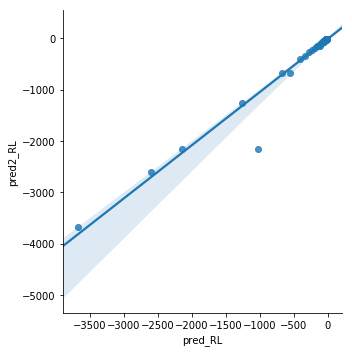

In [27]:
#dfy.plot(x= 'pred_RL', y='pred2_RL', kind = 'scatter')
#Não faz sentido comparar ambos, pos pred está na banda X e pred2 banda Ku
sns.lmplot(x = 'pred_RL',y = 'pred2_RL', data = dfy)

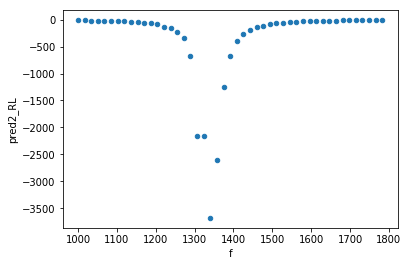

In [28]:
# Aqui está, uma predição da banda-Ku
dfy.plot(x = 'f', y = 'pred2_RL',kind = 'scatter')

### Nova Análise

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./dados/teorico_lorentz_9.77mm_5_.txt', sep= '\t', skipinitialspace = True)

In [4]:
df.head()

,f(GHz),e',"e""",u',"u""",tan_e,tan_u,RL,RL_med,Zin,S11,S21,A,R,T,SEt,SEr,SEa,SEmr
0,8.20,0.03,0.0,0.03,0.0,0.06,0.06,-0.05,-1.19,0.14,1.0,0.02,0.01,0.99,0.0,31.75,22.02,10.53,-0.80
1,8.21,0.03,0.0,0.03,0.0,0.06,0.06,-0.05,-1.19,0.14,1.0,0.02,0.01,0.99,0.0,31.67,21.95,10.52,-0.80
2,8.22,0.03,0.0,0.03,0.0,0.06,0.06,-0.05,-1.19,0.14,1.0,0.02,0.01,0.99,0.0,31.60,21.89,10.51,-0.80
3,8.23,0.03,0.0,0.03,0.0,0.06,0.06,-0.05,-1.19,0.15,1.0,0.02,0.01,0.99,0.0,31.52,21.82,10.50,-0.80
4,8.24,0.03,0.0,0.03,0.0,0.06,0.06,-0.05,-1.19,0.15,1.0,0.02,0.01,0.99,0.0,31.45,21.76,10.50,-0.81


### Analisar Correlação

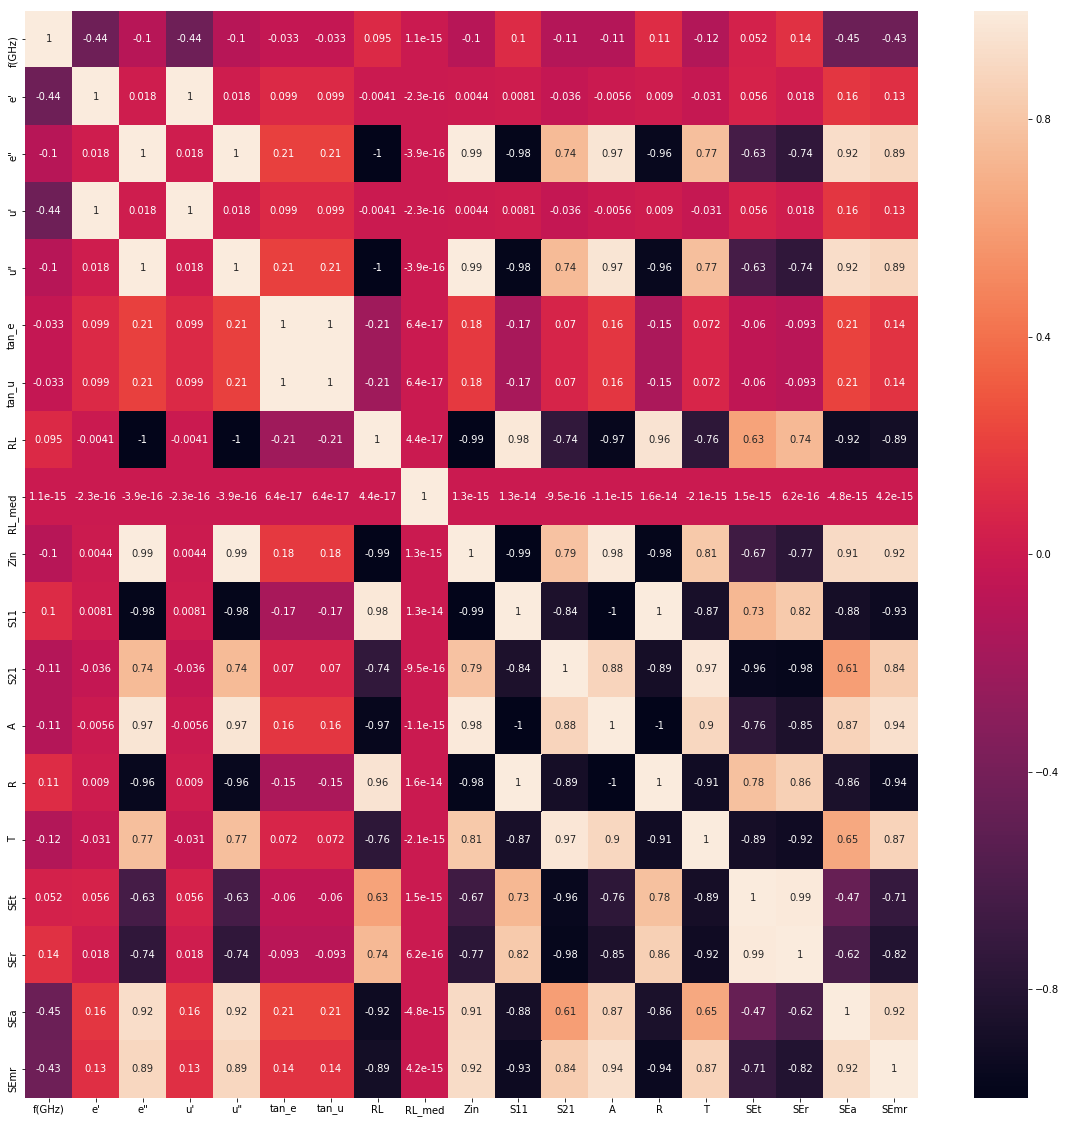

In [8]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(),annot = True)

In [245]:
X = df[['R','S11']]
y = df[['RL']]

### Ajustar Escala

In [246]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

In [247]:
X_scaled.shape,y_scaled.shape

((420, 2), (420, 1))

### Ajustar dados para treinamento

In [248]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(
    X_scaled,
    y_scaled,
    test_size = 0.1,
)

### Criando Redes Neurais

In [249]:
import tensorflow as tf

In [250]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 10,activation = 'relu', input_shape = (2,)))
model.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))
#model.add(tf.keras.layers.Dense(units = 1,activation = 'tanh'))

In [251]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [252]:
model.compile(optimizer= "Adam", loss = 'mean_absolute_error',metrics=['accuracy'])

In [253]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=1,
    validation_split=0.1,#ele pega 20% para fazer validacao epoca por epoca
)

Train on 340 samples, validate on 38 samples
Epoch 1/5
340/340 [==============================] - 1s 3ms/sample - loss: 0.2834 - accuracy: 0.0147 - val_loss: 0.1218 - val_accuracy: 0.0263
Epoch 2/5
340/340 [==============================] - 1s 2ms/sample - loss: 0.0998 - accuracy: 0.0176 - val_loss: 0.0596 - val_accuracy: 0.0263
Epoch 3/5
340/340 [==============================] - 1s 2ms/sample - loss: 0.0688 - accuracy: 0.0176 - val_loss: 0.0517 - val_accuracy: 0.0263
Epoch 4/5
340/340 [==============================] - 1s 2ms/sample - loss: 0.0610 - accuracy: 0.0176 - val_loss: 0.0495 - val_accuracy: 0.0263
Epoch 5/5
340/340 [==============================] - 1s 2ms/sample - loss: 0.0566 - accuracy: 0.0176 - val_loss: 0.0471 - val_accuracy: 0.0263
